# Explicando o Dataset


O conjunto de dados a seguir, criado por R.A. Fisher, contém informações de diversas plantas classificadas como íris.
    
Informação dos atributos: <br>
.comprimento da sépala em centímetros <br>
.largura da sépala em centímetros <br>
.comprimento da pétala em centímetros <br>
.largura da pétala em centímetros
    
A partir disso, será utilizado o método K-means para identificar quantos tipos de íris estão presentes no dataset    

# Implementação K-means

### Importando pacotes


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Exibindo os primeiros 5 elementos

In [27]:
dataset = pd.read_csv('Input Data\iris.csv')
dataset.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Metodo Elbow


O método a seguir nos ajuda a identificar o número ideal de clusters, ajustando o modelo com uma faixa de valores. Caso o gráfico se pareça com um braço, logo, o "cotovelo" será uma boa indicação de que o modelo se ajusta melhor naquele ponto.


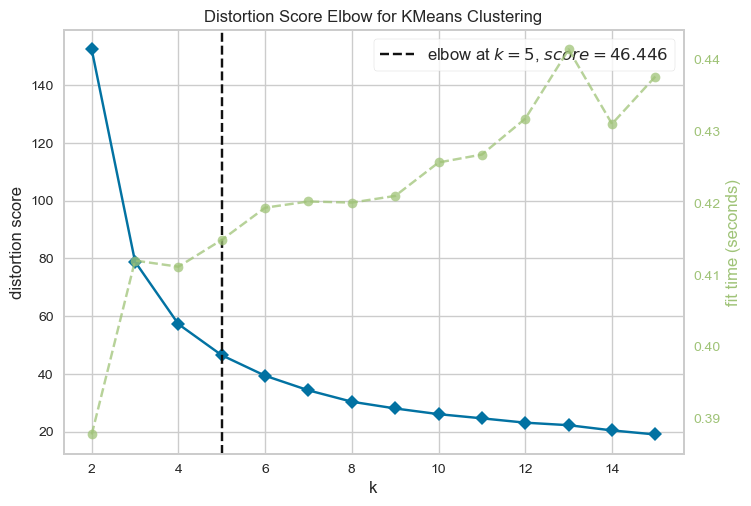

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
features = dataset.iloc[:, 0:7]
target = dataset.iloc[:, -1]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,16))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Com o gráfico Elbow gerado, podemos ver que ele nos informa o valor de k sendo igual a 5. Porém, ainda não é possível encontrar um ponto exato para que possamos usar como número de clusters. Dito isso, antes de adotarmos o valor 5 como resultado, iremos utilizar outro parâmetro, o Sillhouette Score.

### Sillhouette

O Silhouette consiste em um método de interpretação e validação de consistência dentro de agrupamentos de dados. 

Com isso, para encontrarmos a quantidade ideal de clusters, iremos calcular o Silhouette Score para k-means com 3, 4 e 5 clusters, onde o k-mean com maior pontuação será aquele com a quantidade ideal de clusters.

In [60]:
l_clusters = [3, 4, 5]

for i in l_clusters:
    
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features)
    cluster_labels = kmeans.fit_predict(features)
    
    silhouette_avg = metrics.silhouette_score(features, cluster_labels)
    print (f'Silhouette Score com {i} cluster(s) = ', silhouette_avg)

Silhouette Score com 3 cluster(s) =  0.5528190123564102
Silhouette Score com 4 cluster(s) =  0.4974551890173759
Silhouette Score com 5 cluster(s) =  0.48874888709310654


# Conclusão


Dessa forma, podemos concluir que, apesar do gráfico elbow mostrar que o número de clusters é 5, devemos utilizar 3 como valor ideal, já que ele possui o maior silhouette score dentre os pontos que analisamos do gráfico.

Assim, podemos afirmar que essa base de dados contém 3 tipos de íris diferentes.